# Visual Analytics

## Using Schneiderman's mantra within the Visual Analytics Process:

Use visualisation for analysis according the each research question starting from Q1 to Q4. Each research question has a slightly different preprocessed dataset, that originally comes from the same source, and undertook the same handling of missing values.

**Note: Near the end of Question 1, I had to go back to the preprocessing stage because I realised that NaPTAN included many types of stops. Therefore, I had to Filter further to only include Bus Stops**

## **Q1: Categorisation of Urban and Rural Stops** - 
- **Research Question**: How is the distribution of Stop Types and Bus Stop Types differentiated between rural and urban area and how do they influence the accessibility of public transport?

### Overview: Looking at different plots and graphs for categorical data to gain understanding.


In [6]:
!pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   ------- ------------------------------- 20.5/110.5 kB 330.3 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.5 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.1 MB/s eta 0:00:00


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

- Using Parquet formats to preserve the data types from data_preprocessing.ipynb

In [55]:
# Loading the dataset
data = pd.read_parquet('../data/processed/q1_processed_stops.parquet')
print(data.dtypes)
print(data.head())

ATCOCode                             category
NaptanCode                           category
CommonName                           category
NptgLocalityCode                     category
LocalityName                         category
LocalityCentre                           bool
Easting                                 int64
Northing                                int64
Longitude                             float64
Latitude                              float64
StopType                             category
BusStopType                          category
TimingStatus                         category
AdministrativeAreaCode                  int64
CreationDateTime          datetime64[ns, UTC]
ModificationDateTime      datetime64[ns, UTC]
RevisionNumber                          int32
Modification                         category
Status                               category
StopDensity                             int64
UrbanRuralCategory                     object
dtype: object
       ATCOCode Napt

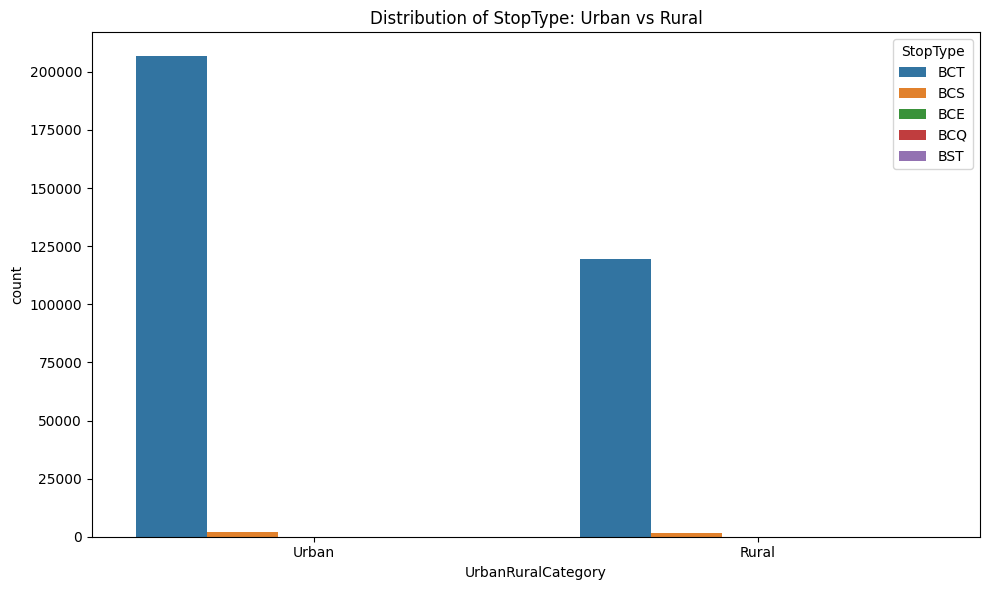

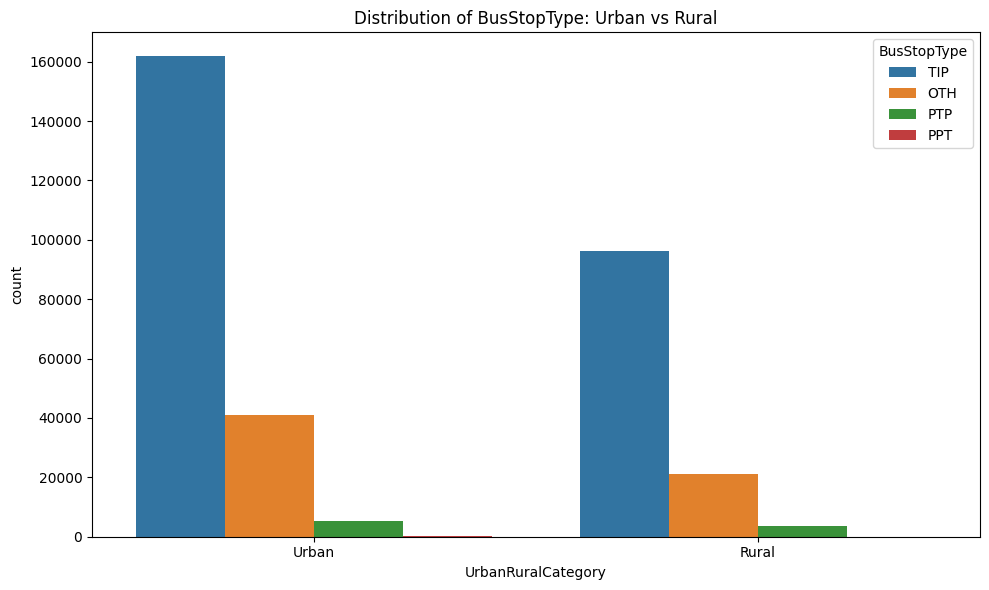

In [58]:
# Filter the data to include only relevant StopTypes
relevant_stoptypes = ['BCT', 'BCS', 'BCE', 'BCQ', 'BST']
filtered_data = data[data['StopType'].isin(relevant_stoptypes)]

# Count plot for StopType distribution between Urban and Rural
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='UrbanRuralCategory', hue='StopType', hue_order=relevant_stoptypes)
plt.title('Distribution of StopType: Urban vs Rural')
plt.tight_layout()
plt.savefig('../outputs/stop_type_distribution.png')  # Saving the plot
plt.show()

# Filter the data to include only relevant BusStopTypes
relevant_bus_stoptypes = ['TIP', 'OTH', 'PTP', 'PPT']
filtered_data_bus = data[data['BusStopType'].isin(relevant_bus_stoptypes)]

# Count plot for BusStopType distribution between Urban and Rural
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data_bus, x='UrbanRuralCategory', hue='BusStopType', hue_order=relevant_bus_stoptypes)
plt.title('Distribution of BusStopType: Urban vs Rural')
plt.tight_layout()
plt.savefig('../outputs/bus_stop_type_distribution.png')  # Saving the plot
plt.show()

- StopType Distribution:  BCT is very dominant. It is hard to see the other categories. I will transform the y axis to a log scale and possibly remove the most dominant variable.
- BusStopType Distribution: TIP is very dominant

### Zoom: **Using Folium to Create Map for London**

In [44]:
# Creating map centered around a specific location like London
#m = folium.Map(location = [51.5074, -0.1278], zoom_start = 6)

# Initialising the  MarkerCluster to group nearby markers
#marker_cluster = MarkerCluster().add_to(m)

#for _, row in data.iterrows():
    #folium.CircleMarker(
        #location = [row['Latitude'], row['Longitude']],
        #radius = 5,
        #color = 'blue' if row['UrbanRuralCategory'] == 'Urban' else 'green',
        #fill = True,
        #fill_color='blue' if row['UrbanRuralCategory'] == 'Urban' else 'green',
        #fill_opacity = 0.7,
        #popup = f"StopType: {row['StopType']}<br>BusStopType: {row['BusStopType']}<br>Location: {row['Latitude']}, {row['Longitude']}"
#    ).add_to(marker_cluster)
    
# Saving the map as an HTML file
#m.save('../outputs/choropleth_map.html')

- I am not suprised that there would be issues here. The size of dataset, which has over 30,000 data items, is far too much for HTML interative maps.
- I am going to do the maps on Tableau 2024.

In [59]:
filtered_data.to_parquet('../data/processed/filtered_data.parquet')

### ** Side-by-side count charts using y log scale**

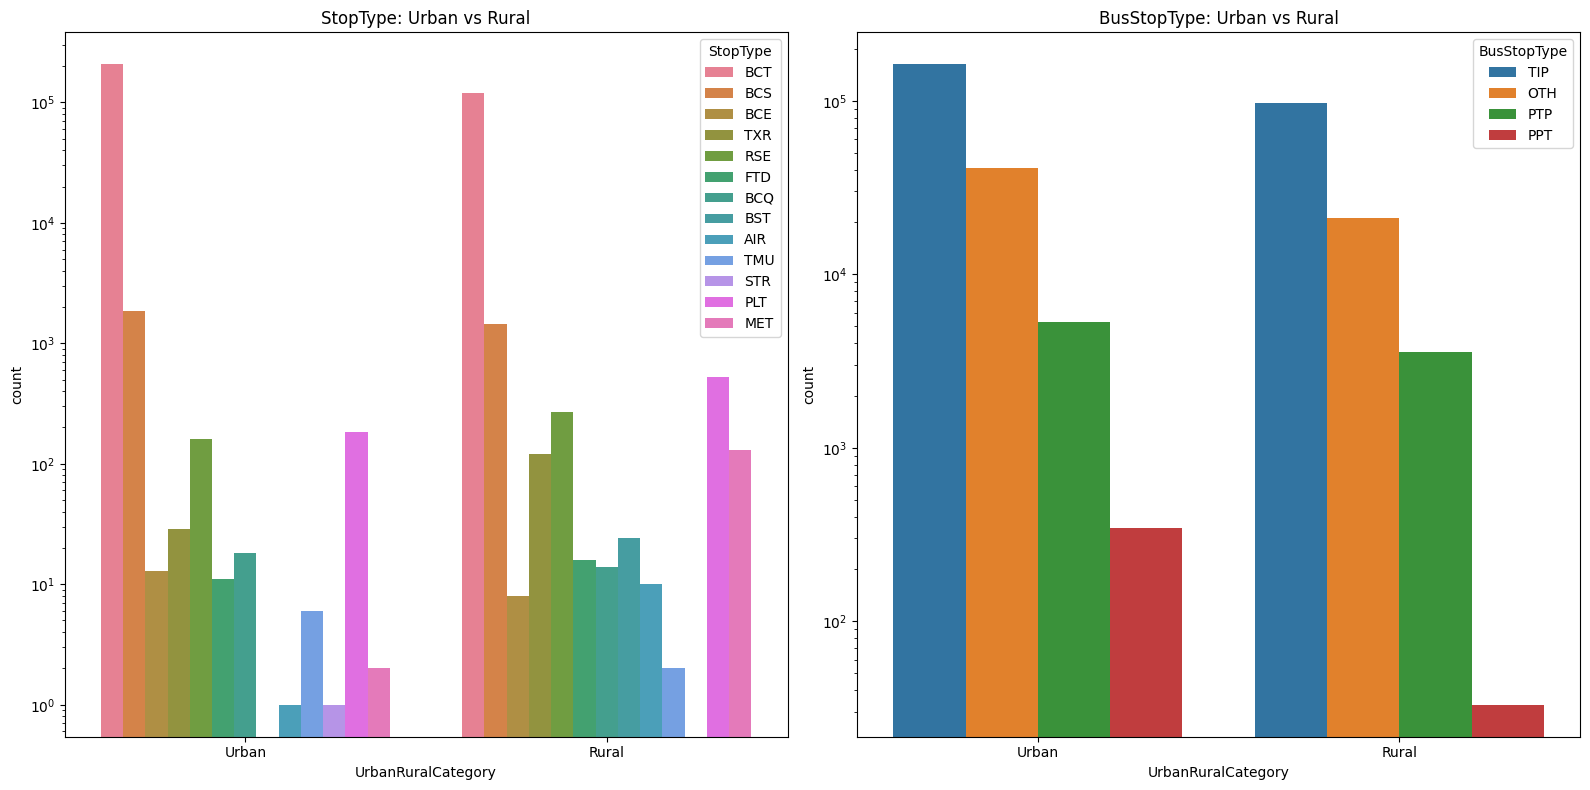

In [24]:
# Plotting side-by-side bar charts for StopType and BusStopType distribution
fig, axes = plt.subplots(1, 2, figsize = (16, 8))

# StopType
sns.countplot(data = data, x = 'UrbanRuralCategory', hue = 'StopType', ax = axes[0])
axes[0].set_title('StopType: Urban vs Rural')
axes[0].set_yscale('log')  # Applying log scale to the y-axis

# BusStopType
sns.countplot(data = data, x = 'UrbanRuralCategory', hue = 'BusStopType', ax = axes[1])
axes[1].set_title('BusStopType: Urban vs Rural')
axes[1].set_yscale('log')  # Applying log scale to the y-axis

plt.tight_layout()
plt.savefig('../outputs/stop_type_bus_stop_type_comparison.png')
plt.show()

### **Filter** - Excluding dominant classes for the sake of imbalance and variability

Initial data shape: (330919, 21)
Unique StopType: ['BCT' 'BCS' 'BCE' 'TXR' 'RSE' 'FTD' 'BCQ' 'BST' 'AIR' 'TMU' 'STR' 'PLT'
 'MET']
Unique BusStopType: ['TIP' 'OTH' 'PTP' 'PPT']
Filtered data shape: (1, 21)
Filtered StopType: ['BCQ']
Filtered BusStopType: ['OTH']


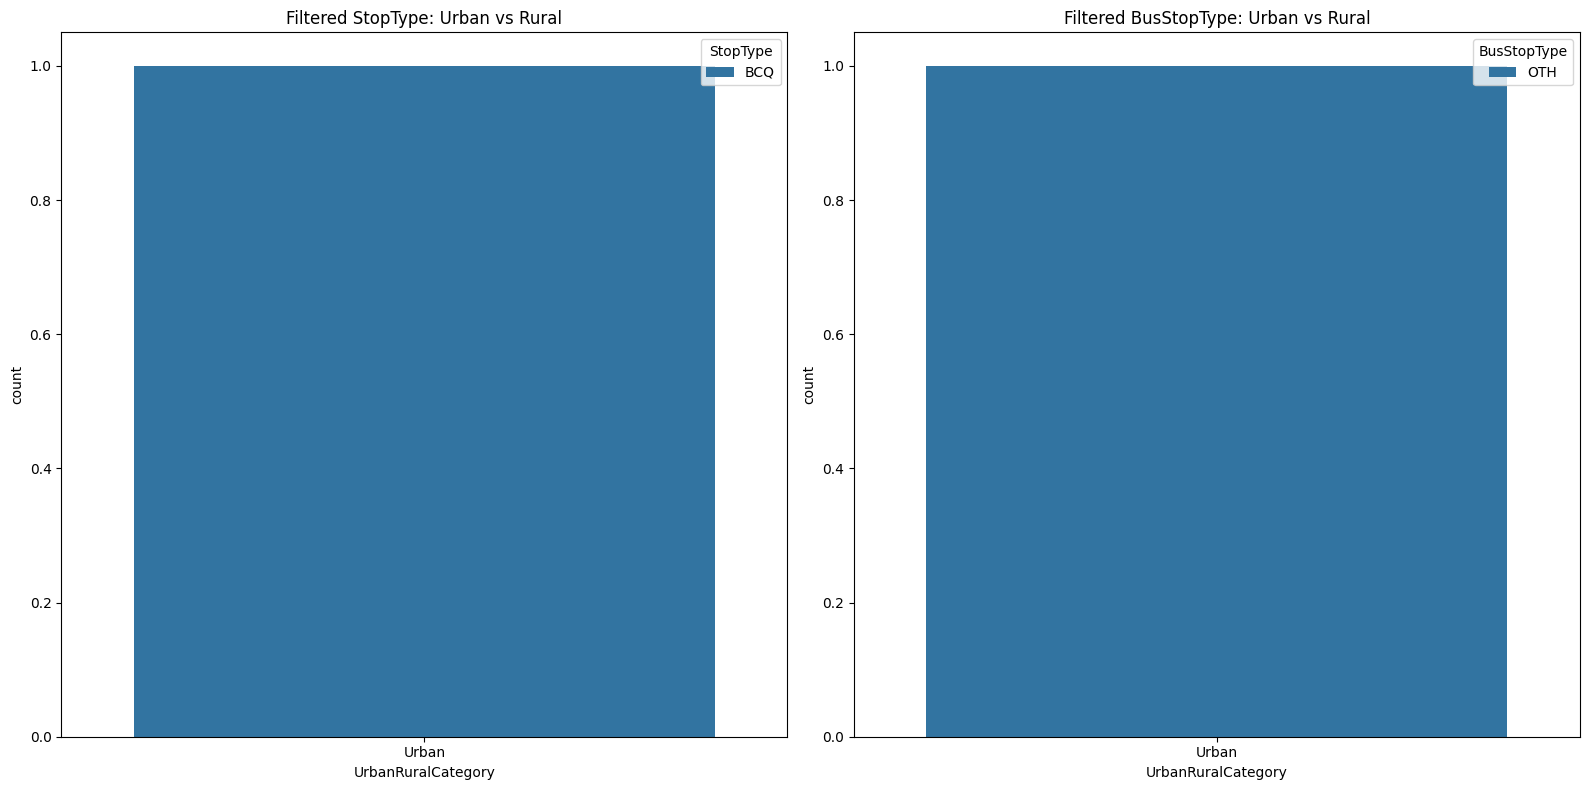

In [40]:
# Check initial dataset size and unique values
#print("Initial data shape:", data.shape)
#print("Unique StopType:", data['StopType'].unique())
#print("Unique BusStopType:", data['BusStopType'].unique())

# Filtering out the dominant StopType and BusStopType categories
#filtered_data = data[
#    ~data['StopType'].isin(['BCT']) & ~data['BusStopType'].isin(['TIP'])
#]

# Check filtered dataset size and unique values
#print("Filtered data shape:", filtered_data.shape)
#print("Filtered StopType:", filtered_data['StopType'].unique())
#print("Filtered BusStopType:", filtered_data['BusStopType'].unique())


# Plotting side-by-side count plots for filtered data
#fig, axes = plt.subplots(1,2, figsize = (16, 8))

# StopType
#sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'StopType', ax = axes[0])
#axes[0].set_title('Filtered StopType: Urban vs Rural')

# BusStopType
#sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'BusStopType', ax = axes[1])
#axes[1].set_title('Filtered BusStopType: Urban vs Rural')

#plt.tight_layout()
#plt.savefig('../outputs/WRONG_filtered_stop_type_ALL_STOP_TYPES_comparison.png')
#plt.show()

- Removing BCT and TIP (Timing Info Point), leaves almost no data to give any insights. Therefore the filtering criteria is too strict. Let's filter out TIP instead of both TIP and BCS.

Initial data shape: (330919, 21)
Unique StopType: ['BCT' 'BCS' 'BCE' 'TXR' 'RSE' 'FTD' 'BCQ' 'BST' 'AIR' 'TMU' 'STR' 'PLT'
 'MET']
Unique BusStopType: ['TIP' 'OTH' 'PTP' 'PPT']
Filtered data shape: (4837, 21)
Filtered StopType: ['BCS' 'BCE' 'TXR' 'RSE' 'FTD' 'BCQ' 'BST' 'AIR' 'TMU' 'STR' 'PLT' 'MET']
Filtered BusStopType: ['TIP' 'OTH']


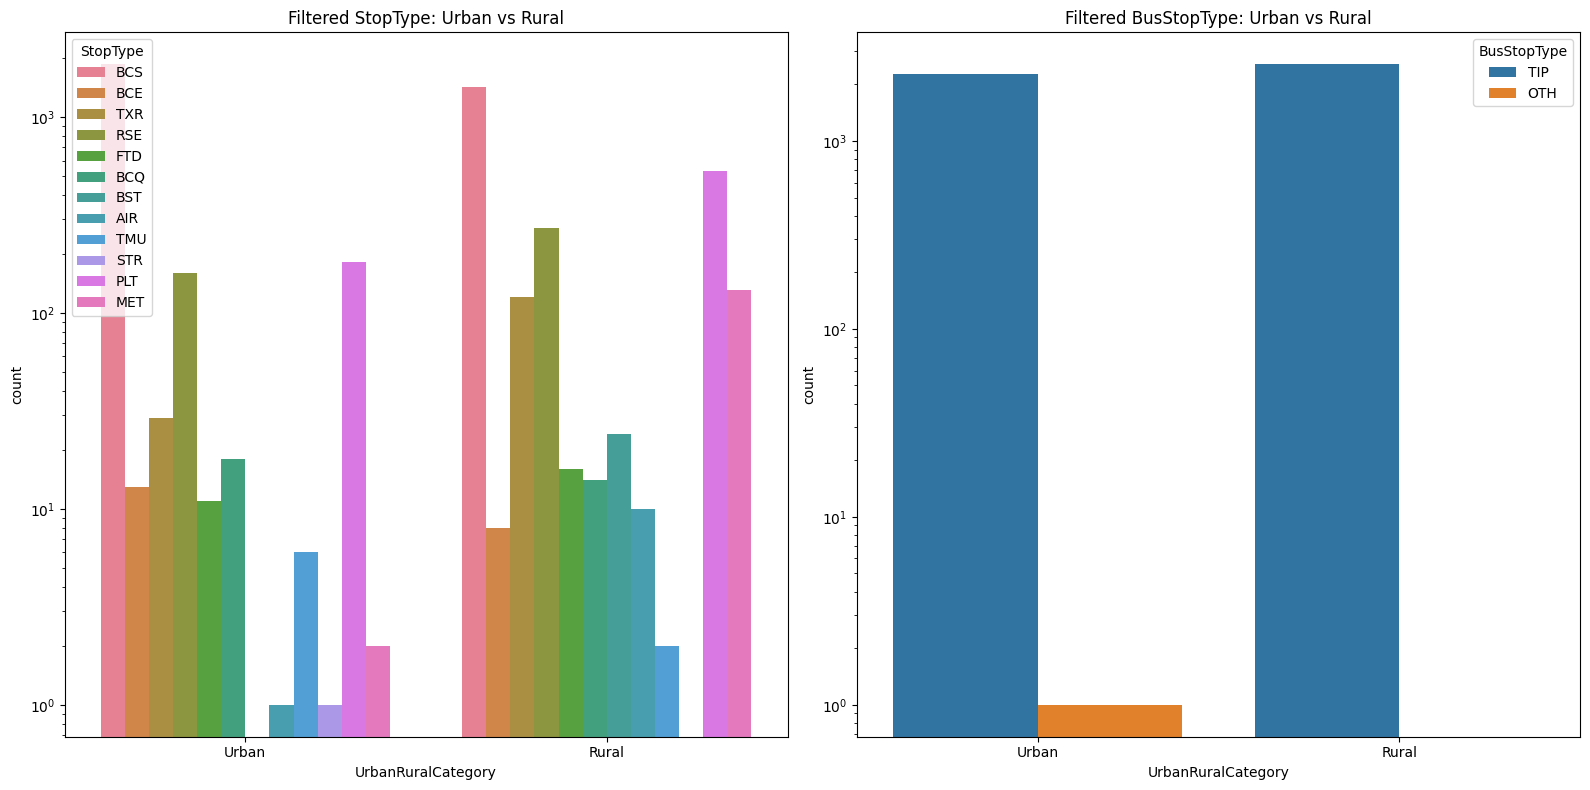

In [38]:
# Check initial dataset size and unique values
#print("Initial data shape:", data.shape)
#print("Unique StopType:", data['StopType'].unique())
#print("Unique BusStopType:", data['BusStopType'].unique())

# Filtering out the dominant BusStopType category
#filtered_data = data[
#    ~data['StopType'].isin(['BCT'])
#]

# Check filtered dataset size and unique values
#print("Filtered data shape:", filtered_data.shape)
#print("Filtered StopType:", filtered_data['StopType'].unique())
#print("Filtered BusStopType:", filtered_data['BusStopType'].unique())

# Plotting side-by-side count plots for filtered data
#fig, axes = plt.subplots(1,2, figsize = (16, 8))

# StopType
#sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'StopType', ax = axes[0])
#axes[0].set_title('Filtered StopType: Urban vs Rural')
#axes[0].set_yscale('log') 

# BusStopType
#sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'BusStopType', ax = axes[1])
#axes[1].set_title('Filtered BusStopType: Urban vs Rural')
#axes[1].set_yscale('log') 

#plt.tight_layout()
#plt.savefig('../outputs/WRONG_filtered_stop_type_ALL_STOP_TYPES_comparison_improved.png')
#plt.show()

- The StopTypes are more balanced while using the y log scale, but I have come to the realisation through research, that many of the StopTypes do not represent Bus Stops according to this source, https://crystalroof.co.uk/api-docs/method/transport-closest-bus-stops and https://naptan.dft.gov.uk/naptan/schema/2.4/doc/NaPTANSchemaGuide-2.4-v0.57.pdf
-  **I have to go back to the preprocessing file and filter again to refine my analysis. I was able to see this with the combination of human reasoning from the imbalanced side-by-side count plots.**

### **2nd Iteration Filter** - Excluding dominant classes for the sake of imbalance and variability

In [ ]:
# Check initial dataset size and unique values
print("Initial data shape:", data.shape)
print("Unique StopType:", data['StopType'].unique())
print("Unique BusStopType:", data['BusStopType'].unique())

# Filtering out the dominant StopType and BusStopType categories
filtered_data = data[
    ~data['StopType'].isin(['BCT']) & ~data['BusStopType'].isin(['TIP'])
]

# Check filtered dataset size and unique values
print("Filtered data shape:", filtered_data.shape)
print("Filtered StopType:", filtered_data['StopType'].unique())
print("Filtered BusStopType:", filtered_data['BusStopType'].unique())


# Plotting side-by-side count plots for filtered data
fig, axes = plt.subplots(1,2, figsize = (16, 8))

# StopType
sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'StopType', ax = axes[0])
axes[0].set_title('Filtered StopType: Urban vs Rural')

# BusStopType
sns.countplot(data = filtered_data, x = 'UrbanRuralCategory', hue = 'BusStopType', ax = axes[1])
axes[1].set_title('Filtered BusStopType: Urban vs Rural')

plt.tight_layout()
plt.savefig('../outputs/filtered_stop_type_bus_stop_type_comparison.png')
plt.show()